# AffectNet dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # plot
import os
from os.path import join

path = ('/kaggle/input/affectnet-training-data/')
file = (path + 'labels.csv')
df = pd.read_csv(file)
df.head()

,Unnamed: 0,pth,label,relFCs
0,0,anger/image0000006.jpg,surprise,0.873142
1,1,anger/image0000060.jpg,anger,0.852311
2,2,anger/image0000061.jpg,anger,0.800957
3,3,anger/image0000066.jpg,disgust,0.843079
4,4,anger/image0000106.jpg,anger,0.849108


In [2]:
df.describe()

,Unnamed: 0,relFCs
count,28175.000000,28175.000000
mean,14087.000000,0.799247
std,8133.566253,0.058755
min,0.000000,0.516357
25%,7043.500000,0.766363
50%,14087.000000,0.809000
75%,21130.500000,0.842068
max,28174.000000,0.899951


In [3]:
df.hist

<bound method hist_frame of        Unnamed: 0                        pth     label    relFCs
0               0     anger/image0000006.jpg  surprise  0.873142
1               1     anger/image0000060.jpg     anger  0.852311
2               2     anger/image0000061.jpg     anger  0.800957
3               3     anger/image0000066.jpg   disgust  0.843079
4               4     anger/image0000106.jpg     anger  0.849108
...           ...                        ...       ...       ...
28170       28170  surprise/image0034960.jpg  surprise  0.825263
28171       28171  surprise/image0034961.jpg  surprise  0.738646
28172       28172  surprise/image0034966.jpg  surprise  0.774524
28173       28173  surprise/image0034973.jpg   neutral  0.766952
28174       28174  surprise/image0042075.jpg   disgust  0.832160

[28175 rows x 4 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28175 entries, 0 to 28174
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28175 non-null  int64  
 1   pth         28175 non-null  object 
 2   label       28175 non-null  object 
 3   relFCs      28175 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.6+ KB


In [5]:
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Number of files in directory {link} is ", num_files)
    return num_files

In [6]:
classes_count = []

classes_count.append(countFile("/kaggle/input/affectnet-training-data/happy"))

classes_count.append(countFile("/kaggle/input/affectnet-training-data/disgust"))

classes_count.append(countFile("/kaggle/input/affectnet-training-data/anger"))

classes_count.append(countFile("/kaggle/input/affectnet-training-data/neutral"))

classes_count.append(countFile("/kaggle/input/affectnet-training-data/surprise"))


Number of files in directory /kaggle/input/affectnet-training-data/happy is  5044
Number of files in directory /kaggle/input/affectnet-training-data/disgust is  2477
Number of files in directory /kaggle/input/affectnet-training-data/anger is  3218
Number of files in directory /kaggle/input/affectnet-training-data/neutral is  5126
Number of files in directory /kaggle/input/affectnet-training-data/surprise is  4039


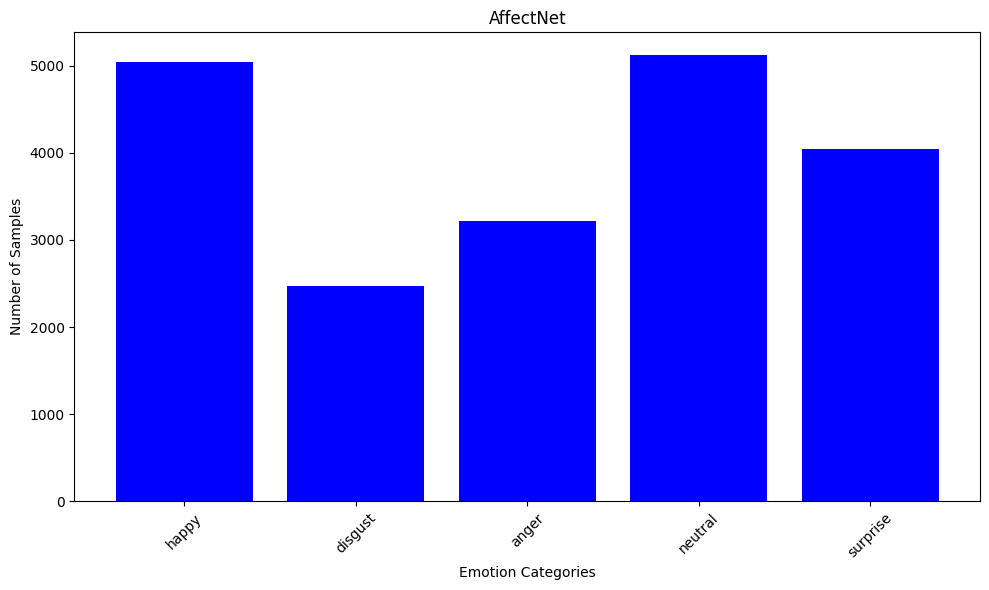

In [7]:
# Data
categories = ['happy', 'disgust', 'anger', 'neutral', 'surprise']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, file_counts, color='blue')
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Samples')
plt.title('AffectNet')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

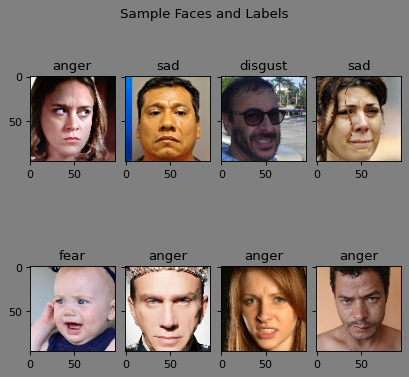

In [8]:
# display random images
import random
import cv2

fig, axs = plt.subplots(2, 4, sharey=True, constrained_layout=True, num=None,
                        figsize=(5, 5), dpi=80, facecolor='gray', edgecolor='k')
fig.suptitle("Sample Faces and Labels")
axs = axs.flatten()

for i in range(8):
    idx = random.randint(0, len(df)-1)  # randomly select an index
    img_path = path + df['pth'][idx]
    img = cv2.imread(img_path)  # read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to BGR to RGB
    axs[i].imshow(img)
    axs[i].set_title(df['label'][idx])

In [9]:
# how many emotions categories
INPUT_PATH = "/kaggle/input/affectnet-training-data/"

IMAGE_SIZE = (96, 96)

In [10]:
# define functions to pre-process and load images into arrays
import numpy as np
from keras.utils import to_categorical

emotion_label = [(1, "anger"), (2, "disgust"), (3, "surprise"), (4, "happy"), (5, "neutral")]

def image_generator(input_path, emotion_label, image_size):
    for index, emotion in emotion_label:
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            #img = cv2.resize(img, image_size)
            #img = img.astype('float32') / 255.0  # Normilize
            yield img, index

def load_images(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [11]:
# Load the images
X, y = load_images(INPUT_PATH, emotion_label, IMAGE_SIZE)
input_shape = X[0].shape
print(type(X),type(y))
print(np.unique(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1 2 3 4 5]


In [12]:
print(X.shape,y.shape)
print(y)

(19904, 96, 96, 3) (19904,)
[1 1 1 ... 5 5 5]


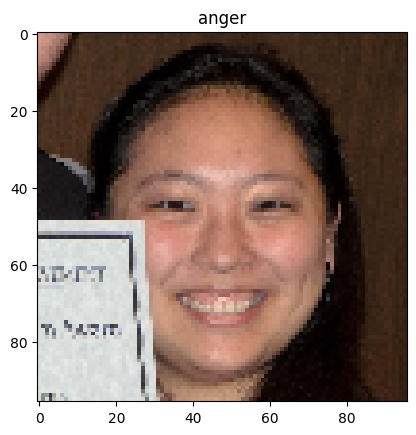

In [13]:
# choose a random image index
idx = np.random.randint(len(X))

# display the image and its corresponding label from arrays
plt.imshow(X[idx])
plt.title(emotion_label[np.argmax(y[idx])][1])
plt.show()

In [14]:
def shuffle_and_cut_data(X, y, threshold):
    num_classes = 7
    X_limited = []
    y_limited = []

    for class_idx in range(num_classes):
        class_indices = np.where(y[:] == class_idx + 1)[0]
        
        np.random.shuffle(class_indices)
        
        selected_indices = class_indices[:threshold]
        
        # Append the selected data
        X_limited.append(X[selected_indices])
        y_limited.append(y[selected_indices])

    # Concatenate the limited data
    X_limited = np.concatenate(X_limited, axis=0)
    y_limited = np.concatenate(y_limited, axis=0)

    # Shuffle the entire dataset
    shuffled_indices = np.random.permutation(len(y_limited))
    X_limited = X_limited[shuffled_indices]
    y_limited = y_limited[shuffled_indices]

    return X_limited, y_limited
X, y = shuffle_and_cut_data(X, y, threshold = min(classes_count))


# FER+

In [15]:
def find_Class(directory_path):
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory '{directory_path}' does not exist.")
    if not os.path.isdir(directory_path):
        raise ValueError(f"The path '{directory_path}' is not a directory.")
    
    # Get a list of all entries in the directory
    all_entries = os.listdir(directory_path)
    
    # Filter out only directories
    folders = [entry for entry in all_entries if os.path.isdir(os.path.join(directory_path, entry))]
    
    return folders

In [16]:
DIRECTORY = "/kaggle/input/fer2013pluscleanedaugmballanced1/train"
CATEGORIES = []
try:
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}':")
    for folder in folders:
        CATEGORIES.append(folder)
except ValueError as e:
    print(e)

CATEGORIES = [(1, "Anger"), (2, "Disgust"), (3, "Surprise"), (4, "Happy"), (5, "Neutral")]

Directories in '/kaggle/input/fer2013pluscleanedaugmballanced1/train':


In [17]:
# Load train data

data = []

for categories in CATEGORIES:
    folder = os.path.join(DIRECTORY,categories[1])
    
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        img_arr = cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (96, 96), interpolation = cv2.INTER_CUBIC)
            data.append([img_arr, categories[0]])
        else:
            print(f"Failed to load image {img}")

In [18]:
# Add test data to train data

DIRECTORY = '/kaggle/input/fer2013pluscleanedaugmballanced1/test'
for categories in CATEGORIES:
    folder = os.path.join(DIRECTORY,categories[1])
     
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        img_arr = cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (96, 96), interpolation=cv2.INTER_CUBIC)
            data.append([img_arr, categories[0]])
        else:
            print(f"Failed to load image {img}")

In [19]:
X_temp = []
y_temp = []
for features,label in data:
    X_temp.append(features)
    y_temp.append(int(label))
X_temp = np.array(X_temp)
y_temp = np.array(y_temp)
print(X_temp.shape, y_temp.shape)
print(y_temp)

(20851, 96, 96, 3) (20851,)
[1 1 1 ... 5 5 5]


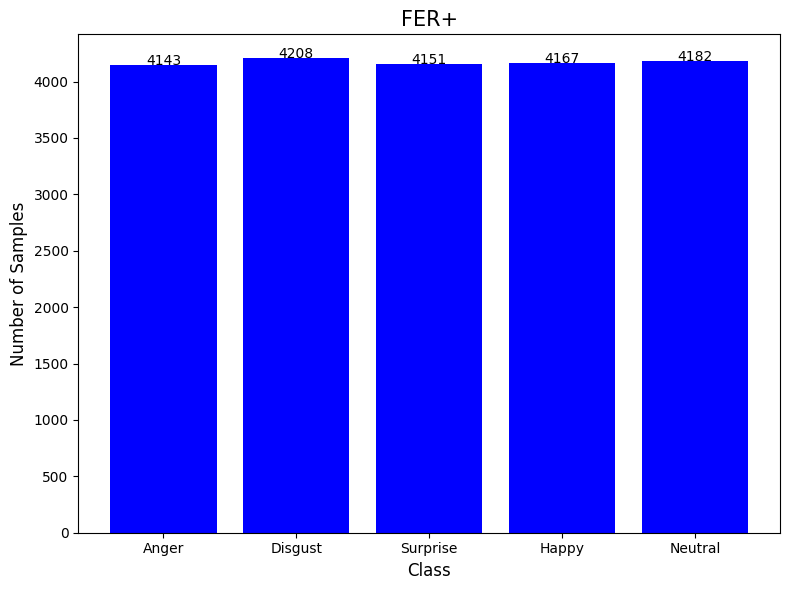

In [20]:
from collections import Counter

# Calculate class distribution
class_distribution = Counter(y_temp)
class_labels = list(class_distribution.keys())
counts = list(class_distribution.values())

plt.figure(figsize=(8, 6))
plt.bar(class_labels, counts, color='blue')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('FER+', fontsize=15)

for i, count in enumerate(counts):
    plt.text(class_labels[i], count + 0.5, str(count), ha='center', fontsize=10)
plt.xticks(ticks=class_labels, labels=[str(label) for num, label in CATEGORIES], fontsize=10)
plt.tight_layout()
plt.show()

In [21]:
X = np.concatenate((X,X_temp))
print(X.shape)
y = np.concatenate((y,y_temp))
print(y.shape)

(33236, 96, 96, 3)
(33236,)


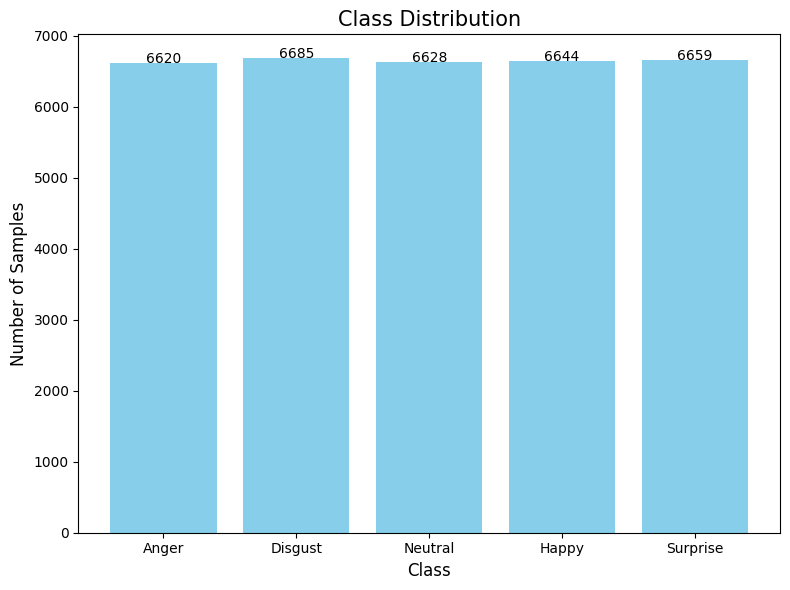

In [22]:
from collections import Counter

# Calculate class distribution
class_distribution = Counter(y)
class_labels = list(class_distribution.keys())
counts = list(class_distribution.values())

plt.figure(figsize=(8, 6))
plt.bar(class_labels, counts, color='skyblue')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Class Distribution', fontsize=15)

for i, count in enumerate(counts):
    plt.text(class_labels[i], count + 0.5, str(count), ha='center', fontsize=10)
plt.xticks(ticks=class_labels, labels=[str(label) for num, label in CATEGORIES], fontsize=10)
plt.tight_layout()
plt.show()

In [23]:
from tqdm import tqdm 

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(gray)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    background = cv2.morphologyEx(contrast_enhanced, cv2.MORPH_CLOSE, kernel)
    illumination_corrected = cv2.divide(contrast_enhanced, background, scale=255)

    final_image = cv2.bilateralFilter(illumination_corrected, d=9, sigmaColor=75, sigmaSpace=75)
    
    return final_image

In [24]:
def preprocess_dataset(X):
    preprocessed_images = []
    
    for img in tqdm(X, desc="Preprocessing Images"):
        preprocessed_image = preprocess_image(img)
        preprocessed_images.append(preprocessed_image)
    
    # Convert list to numpy array and expand dimensions for grayscale images
    preprocessed_images = np.array(preprocessed_images)
    preprocessed_images = np.expand_dims(preprocessed_images, axis=-1)  # Add channel dimension
    return preprocessed_images

In [25]:
# Apply preprocessing to the entire dataset
print("Original dataset shape:", X.shape)

X = preprocess_dataset(X)

# Verify shapes
print("Preprocessed dataset shape:", X.shape)

# Normalizing preprocessed images
X = X / 255.0
input_shape = X[0].shape
print(input_shape)

Original dataset shape: (33236, 96, 96, 3)


Preprocessing Images: 100%|██████████| 33236/33236 [00:58<00:00, 564.82it/s]


Preprocessed dataset shape: (33236, 96, 96, 1)
(96, 96, 1)


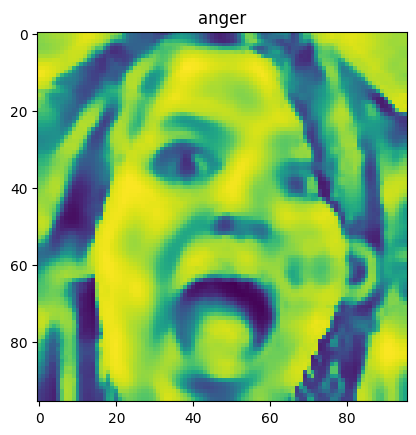

In [26]:
# choose a random image index
idx = np.random.randint(len(X))

# display the image and its corresponding label from arrays
plt.imshow(X[idx])
plt.title(emotion_label[np.argmax(y[idx])][1])
plt.show()

In [27]:
# Train test split data

from sklearn.model_selection import StratifiedShuffleSplit
print(np.unique(y))
y = y - 1
y = to_categorical(y)
print(y.shape)
print(y[0])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print("Train indices:", train_index)
print("Test indices:", test_index)

print("\nX_train:\n", X_train.shape)
print("y_train:", y_train.shape)

print("\nX_test:\n", X_test.shape)
print("y_test:", y_test.shape)

[1 2 3 4 5]
(33236, 5)
[1. 0. 0. 0. 0.]
Train indices: [ 7075 12942 12084 ... 21822  9909 19372]
Test indices: [13617 31330  2691 ... 24109 31238 30092]

X_train:
 (26588, 96, 96, 1)
y_train: (26588, 5)

X_test:
 (6648, 96, 96, 1)
y_test: (6648, 5)


# Model

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPool2D, GlobalAveragePooling2D, SpatialDropout2D, RandomFlip,RandomRotation,RandomZoom,RandomContrast
from keras.regularizers import l2
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, Add, Input
from tensorflow.keras.regularizers import l2

model_4 = Sequential()

model_4.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(96, 96, 1), kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2, 2)))
model_4.add(SpatialDropout2D(0.3))

model_4.add(Conv2D(64, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2, 2)))
model_4.add(SpatialDropout2D(0.4))

model_4.add(Conv2D(128, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2, 2)))
model_4.add(SpatialDropout2D(0.5))

model_4.add(Conv2D(256, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(Conv2D(256, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2, 2)))
model_4.add(SpatialDropout2D(0.5))

model_4.add(Conv2D(512, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(Conv2D(512, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2, 2)))
model_4.add(SpatialDropout2D(0.5))

model_4.add(Flatten())
model_4.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))

model_4.add(Dense(len(y[0]), activation='softmax'))

model_4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
					rotation_range=5,
					shear_range=0.1,
					zoom_range=0.1,
					horizontal_flip=True,
					fill_mode='nearest',
                    brightness_range=[0.8, 1.2])   

augmented_data = datagen.flow(X_train, y_train, batch_size=128, shuffle=True)
X_augmented, y_augmented = next(augmented_data)

In [30]:
history = model_4.fit(X_train, y_train, batch_size=32,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks = [EarlyStopping(patience=5, monitor='val_loss', mode='min'),
                                 ReduceLROnPlateau(monitor='val_loss',
                                                   factor=0.5,
                                                   patience=2,
                                                   verbose=1),
                                 ModelCheckpoint('best_model.weights.h5',
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 monitor='val_accuracy',
                                                 mode='max')],
                    verbose=1)

Epoch 1/50


I0000 00:00:1735562597.132151    1991 service.cc:145] XLA service 0x7ba554010320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735562597.132211    1991 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  7/831 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.2028 - loss: 25.1682  

I0000 00:00:1735562611.202630    1991 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


831/831 ━━━━━━━━━━━━━━━━━━━━ 54s 41ms/step - accuracy: 0.2259 - loss: 24.7058 - val_accuracy: 0.2711 - val_loss: 22.6323 - learning_rate: 1.0000e-04
Epoch 2/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.2594 - loss: 22.2178 - val_accuracy: 0.3571 - val_loss: 19.7207 - learning_rate: 1.0000e-04
Epoch 3/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.3128 - loss: 19.2172 - val_accuracy: 0.4648 - val_loss: 16.4031 - learning_rate: 1.0000e-04
Epoch 4/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.3891 - loss: 15.8829 - val_accuracy: 0.5290 - val_loss: 13.1326 - learning_rate: 1.0000e-04
Epoch 5/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.4473 - loss: 12.6310 - val_accuracy: 0.5674 - val_loss: 10.1072 - learning_rate: 1.0000e-04
Epoch 6/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5084 - loss: 9.6266 - val_accuracy: 0.6101 - val_loss: 7.4677 - learning_rate: 1.0000e-04
Epoch 7/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step

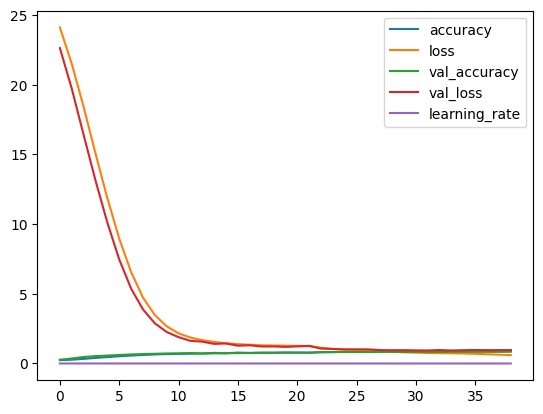

In [31]:
pd.DataFrame(history.history).plot();

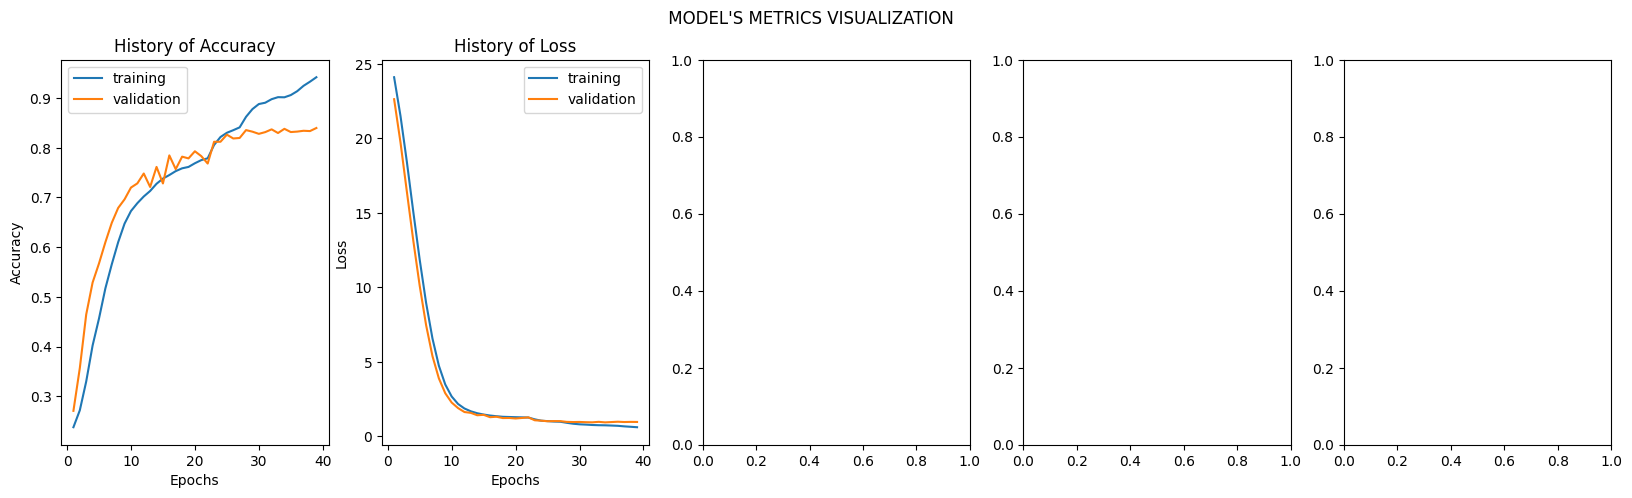

In [33]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])

    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    plt.show()

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'])

208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


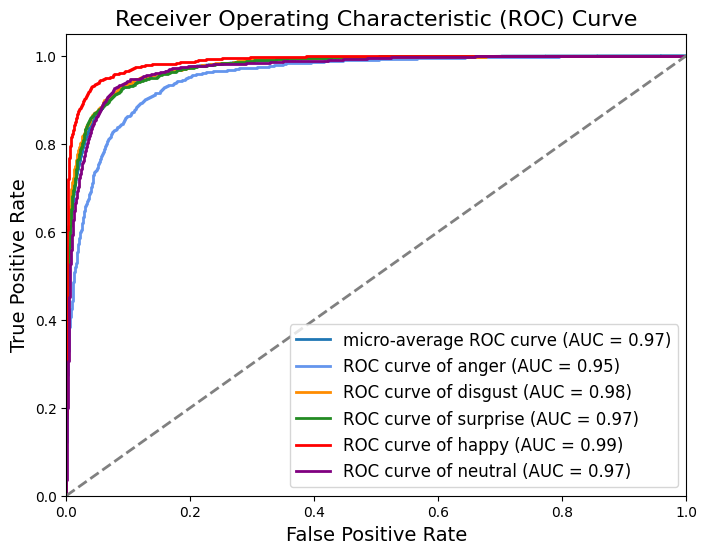

In [34]:
# calculates the false positive rate, true positive rate, and AUC score

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model_4.predict(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Plot the ROC curves for each class and the micro-average ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
                                                   ''.format(roc_auc["micro"]))
colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(emotion_label[i][1], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [35]:
# Compute classification report
from sklearn.metrics import classification_report

# Convert one-hot encoded y_test back to integers
y_test_int = np.argmax(y_test, axis=1)

# Make predictions
y_pred = model_4.predict(X_test)

# Convert one-hot encoded y_pred back to integers
y_pred_int = np.argmax(y_pred, axis=1)

# Generate classification report
print(classification_report(y_test_int, y_pred_int))

208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1324
           1       0.85      0.85      0.85      1337
           2       0.83      0.86      0.85      1326
           3       0.89      0.89      0.89      1329
           4       0.84      0.83      0.83      1332

    accuracy                           0.84      6648
   macro avg       0.84      0.84      0.84      6648
weighted avg       0.84      0.84      0.84      6648



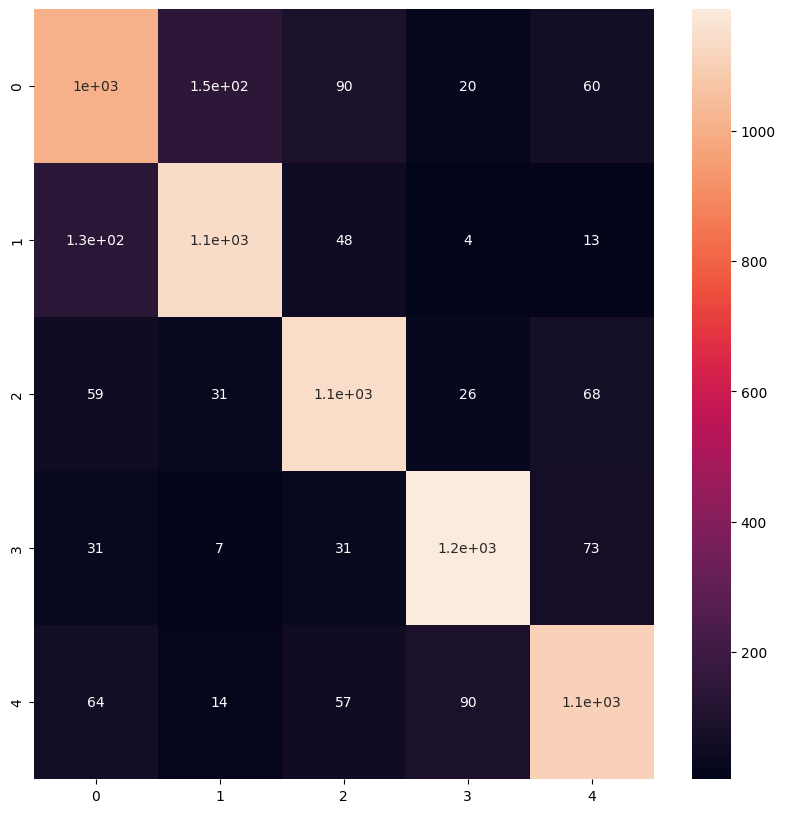

In [36]:
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test_int, y_pred_int)
sns.heatmap(cm, annot=True)
plt.show()

In [37]:
# save the model
model_4.save('/kaggle/working/model_4.h5')